# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Nguyễn Tấn Lộc
- MSSV: 22127236
- Lớp: 22CLC03

## Import các thư viện liên quan

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Helper functions

In [13]:

def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    
    # YOUR CODE HERE
    img = Image.open(img_path)
    img_2d = np.array(img)
    return img_2d


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)
    plt.axis('off')
    plt.show()


def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    
    img = Image.fromarray(img_2d)
    img.save(img_path)


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    # Flatten the 2D image to 1D
    img_1d = img_2d.reshape(img_2d.shape[0] * img_2d.shape[1], 3)

    return img_1d


def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE
    # Choose init centroids
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    # Initialize empty labels array
    labels = np.zeros(img_1d.shape[0], dtype = int)
    
    
    for _ in range (max_iter):
        # Calculate distances from each pixel to centroids
        distances = calculate_distances(img_1d, centroids)
        # Assign labels for each pixels
        new_labels = find_labels(distances)
        # Find new centroid of each cluster
        new_centroids = find_new_centroids(img_1d, new_labels, k_clusters)
        
        # Stop loop when it converge
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        labels = new_labels
        
    return centroids, labels




def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    # Get height, width and number of channels of image
    height, width, num_channels = img_2d_shape

    # Create an empty array for the new image
    new_img = np.zeros((height, width, num_channels), dtype= np.uint8)

    # Assign each pixel in the new image to its corresponding centroid color
    for i in range(height):
        for j in range(width):
            # Calculate the index of the pixel in the 1D labels array
            pixel_index = i * width + j
            # Get the label for the current pixel
            centroid_index = labels[pixel_index]
            # Assign the color of  centroid to the new image
            new_img[i, j] = centroids[centroid_index]
            
    return new_img



# Your additional functions here
def initialize_centroids(img_1d, k_clusters, method):
        if method == 'random':
            # Random values between 0 and 255 for each channel
            centroids = np.random.randint(0, 256, size=(k_clusters, img_1d.shape[1]))
        elif method == 'in_pixels':
            # Randomly select k_pixels from the image as centroids
            indices = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
            centroids = img_1d[indices]
        return centroids

def calculate_distances(img_1d, centroids):
    # Expand the image to 3d
    expand_image = img_1d[:, np.newaxis]
    # Calculate Euclid distance using np.linalg.norm
    distances = np.linalg.norm(expand_image - centroids, axis=2)
    return distances

def find_labels(distances):
    # Find index of centroid for each pixel
    labels = np.argmin(distances, axis=1)
    return labels

def find_new_centroids(img_1d, labels, k_clusters):
    num_channels = img_1d.shape[1]
    new_centroids = np.zeros((k_clusters, num_channels))

    # For each cluster, find its new centroid
    for i in range(k_clusters):
        # Select the pixels that belong to the current cluster
        cluster_pixels = img_1d[labels == i]
        
        # If the cluster has any pixels assigned to it
        if len(cluster_pixels) > 0:
            # Find the mean of the cluster pixels to find the new centroid
            new_centroids[i] = cluster_pixels.mean(axis=0)
        else:
            # If no pixels are assigned to this cluster, reinitialize it with a random color
            new_centroids[i] = np.random.randint(0, 256, num_channels)

    return new_centroids
    

## Your tests

(567, 850, 3)


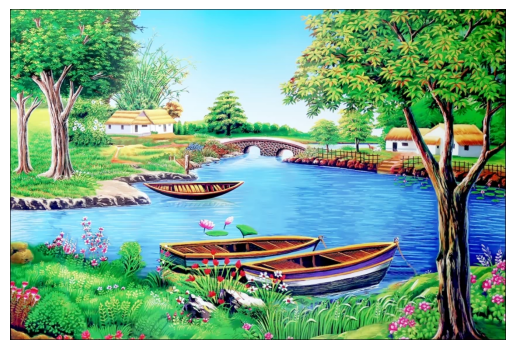

9
2
<class 'numpy.ndarray'>


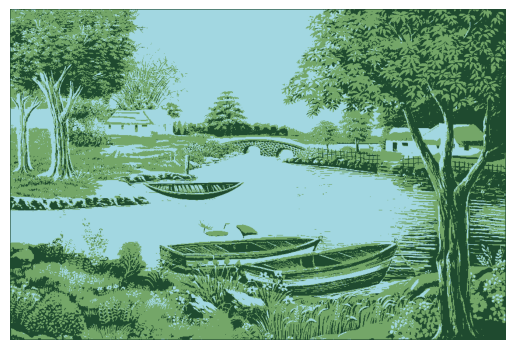

In [19]:
# YOUR CODE HERE

a = read_img("SamplePic.pdf")
print(a.shape)
show_img(a)

b = convert_img_to_1d(a)

centroid, labels = kmeans(b, k_clusters=3, max_iter=100, init_centroids='random')

print(centroid.size)
print(centroid.ndim)
print(type(centroid))
# print(labels.size)
# print(labels.ndim)

x = generate_2d_img(a.shape, centroid, labels)

show_img(x)

# print(a.dtype)
# print(a.shape)
# print(a.ndim)
# print(x.dtype)
# print(x.shape)
# print(x.ndim)

# save_img(x, "Result.jpg")

## Main FUNCTION

In [ ]:
# YOUR CODE HERE
def main():
    img_path = input("Enter the original image path: ")
    img_2d = read_img(img_path)
    img_1d = convert_img_to_1d(img_2d)
    
    k_clusters = int(input("Enter number k: "))
    
    centroids, labels = kmeans(img_1d, k_clusters, max_iter=100)
    new_img_2d = generate_2d_img(img_2d.shape, centroids, labels)
    
    print("--------")
    print("1. PNG")
    print("2. PDF")
    print("3. JPG")
    print("4. JPEG")
    
    format_choice = input("Choose a format to save the image: ")
    
    if format_choice == "1":
        save_path = input("Enter the file name to save (with .png extension): ")
        save_img(new_img_2d, save_path)
    elif format_choice == "2":
        save_path = input("Enter the file name to save (with .pdf extension): ")
        save_img(new_img_2d, save_path)
    elif format_choice == "3":
        save_path = input("Enter the file name to save (with .jpg extension): ")
        save_img(new_img_2d, save_path)    
    elif format_choice == "4":
        save_path = input("Enter the file name to save (with .jpeg extension): ")
        save_img(new_img_2d, save_path)
        
    else:
        print("Invalid choice")

In [ ]:
# Call main function
if __name__ == "__main__":
    main()

--------
1. PNG
2. PDF
3. JPG
4. JPEG
